<a href="https://colab.research.google.com/github/AYYasaswini/testmyprojectAI/blob/master/EVA_Assignment5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add, BatchNormalization
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
from keras.datasets import mnist
from keras import regularizers

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()


(60000, 28, 28)


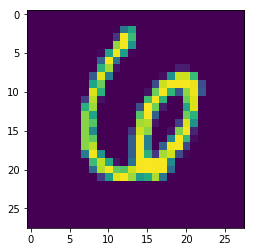

In [0]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[1])
plt.imshow(X_test[66])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [0]:
y_train[:10]
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [0]:
Y_train[:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [0]:
from keras.layers import Activation
model = Sequential()
 
model.add(Convolution2D(16, 3, 3, input_shape=(28,28,1),kernel_regularizer=regularizers.l2(0.01))) #26
model.add(BatchNormalization())
model.add(Activation('relu'))  
model.add(Dropout(0.1))

model.add(Convolution2D(32, 3, 3,kernel_regularizer=regularizers.l2(0.01))) #24
model.add(BatchNormalization())
model.add(Activation('relu'))  
model.add(Dropout(0.1))

model.add(Convolution2D(10, 1, 1))
model.add(Activation('relu')) #22

model.add(MaxPooling2D(pool_size=(2, 2)))#11

model.add(Convolution2D(16, 3, 3,kernel_regularizer=regularizers.l2(0.01)))#9
model.add(BatchNormalization())
model.add(Activation('relu'))  
model.add(Dropout(0.1))


model.add(Convolution2D(16, 3, 3,kernel_regularizer=regularizers.l2(0.01)))#7
model.add(BatchNormalization())
model.add(Activation('relu'))  
model.add(Dropout(0.1))
                                                                                                                                                                                                                                                   

model.add(Convolution2D(16, 3, 3,kernel_regularizer=regularizers.l2(0.01)))#5
model.add(BatchNormalization())
model.add(Activation('relu'))  
model.add(Dropout(0.1))


model.add(Convolution2D(16, 3, 3,kernel_regularizer=regularizers.l2(0.01)))#3
model.add(BatchNormalization())
model.add(Activation('relu'))  
model.add(Dropout(0.1))


model.add(Convolution2D(10, 4, 4,kernel_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))


model.add(Flatten())
model.add(Activation('softmax'))


model.summary()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), input_shape=(28, 28, 1..., kernel_regularizer=<keras.reg...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), kernel_regularizer=<keras.reg...)`
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1))`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), kernel_regularizer=<keras.reg...)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), kernel_regularizer=<keras.reg...)`
/usr/local/lib/python3.6/dist-packages/ipy

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 26, 26, 16)        160       
_________________________________________________________________
batch_normalization_15 (Batc (None, 26, 26, 16)        64        
_________________________________________________________________
activation_17 (Activation)   (None, 26, 26, 16)        0         
_________________________________________________________________
dropout_15 (Dropout)         (None, 26, 26, 16)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 24, 24, 32)        4640      
_________________________________________________________________
batch_normalization_16 (Batc (None, 24, 24, 32)        128       
_________________________________________________________________
activation_18 (Activation)   (None, 24, 24, 32)        0         
__________

In [0]:
from keras.optimizers import Adam

model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.01), metrics=['accuracy'])
datagen = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True)


model.fit_generator(datagen.flow(X_train, Y_train, batch_size=32),validation_data=(X_test, Y_test), 
                    steps_per_epoch=len(X_train) / 32, epochs=10)

Epoch 1/10


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:724: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


1875/1875 [==============================] - 27s 14ms/step - loss: 0.9544 - acc: 0.8196 - val_loss: 0.6437 - val_acc: 0.9372
Epoch 2/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.8141 - acc: 0.8446 - val_loss: 0.7476 - val_acc: 0.8677
Epoch 3/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.7848 - acc: 0.8451 - val_loss: 1.0313 - val_acc: 0.7654
Epoch 4/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.7667 - acc: 0.8502 - val_loss: 0.7776 - val_acc: 0.8599
Epoch 5/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.7529 - acc: 0.8497 - val_loss: 0.5906 - val_acc: 0.9123
Epoch 6/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.7409 - acc: 0.8505 - val_loss: 0.6293 - val_acc: 0.8827
Epoch 7/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.7284 - acc: 0.8539 - val_loss: 0.4840 - val_acc: 0.9452
Epoch 8/10
1875/1875 [==============================] - 25s

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)
print(score)

[0.5848162168502807, 0.8997]


In [0]:
pred=model.predict(X_test)
pred_digits=np.argmax(pred,axis=1)

In [0]:
i=0
prop_class=[]
mis_class=[]

for i in range(len(Y_test)):
    if(np.argmax(Y_test[i])==pred_digits[i]):
        prop_class.append(i)
    #if(len(prop_class)==8):
        #break

i=0
for i in range(len(Y_test)):
    if(not np.argmax(Y_test[i])==pred_digits[i]):
        mis_class.append(i)
    #if(len(mis_class)==8):
        #break

In [0]:
Y_test.shape

(10000, 10)

In [0]:
print(X_test.shape)

(10000, 28, 28, 1)


In [0]:
print(len(mis_class))

1003


Index of Misclassified: 66
Actual Value 6
predicted Value 0
Index of Misclassified: 72
Actual Value 2
predicted Value 0
Index of Misclassified: 73
Actual Value 9
predicted Value 7
Index of Misclassified: 92
Actual Value 9
predicted Value 4
Index of Misclassified: 97
Actual Value 7
predicted Value 3
Index of Misclassified: 104
Actual Value 9
predicted Value 5
Index of Misclassified: 110
Actual Value 8
predicted Value 3
Index of Misclassified: 119
Actual Value 2
predicted Value 7
Index of Misclassified: 149
Actual Value 2
predicted Value 4
Index of Misclassified: 177
Actual Value 8
predicted Value 3
Index of Misclassified: 179
Actual Value 8
predicted Value 3
Index of Misclassified: 184
Actual Value 8
predicted Value 3
Index of Misclassified: 195
Actual Value 3
predicted Value 4
Index of Misclassified: 233
Actual Value 8
predicted Value 9
Index of Misclassified: 242
Actual Value 8
predicted Value 7
Index of Misclassified: 243
Actual Value 7
predicted Value 3
Index of Misclassified: 244
A

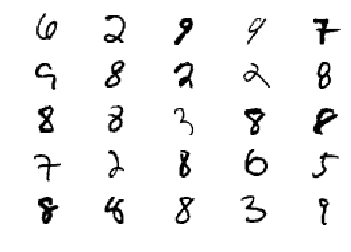

In [0]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
for index in range(len(mis_class)):
    plt.subplot(5, 5, index+1)
    # Don't plot any axes
    plt.axis('off')
    # Display images in all subplots 
    print("Index of Misclassified:",mis_class[index])
    plt.imshow(X_test[mis_class[index]], cmap=plt.cm.gray_r,interpolation='nearest')
    # Add a title to each subplot
    act_value = y_test[mis_class[index]]
    pred_value = pred_digits[mis_class[index]]
    print("Actual Value",act_value)
    print("predicted Value",pred_value)
    if(index == 24):
        break
    plt.title('Actual Value ' + Y_test[mis_class[index]])
